**Regression**

In [1]:
import numpy as np

adv = np.array([3 , 5 , 7, 6 , 9, 12]).reshape(6,1)      #feature
sales = np.array([4, 7 , 8, 5, 12 , 13]).reshape(6,1)    #label

In [2]:
print(adv)

[[ 3]
 [ 5]
 [ 7]
 [ 6]
 [ 9]
 [12]]


In [3]:
print(sales)

[[ 4]
 [ 7]
 [ 8]
 [ 5]
 [12]
 [13]]


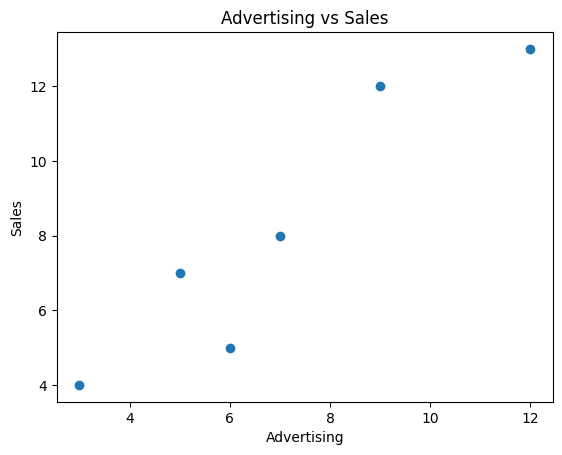

In [4]:
import matplotlib.pyplot as plt
plt.scatter(adv , sales)

plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Advertising vs Sales")

plt.show()

* Simple linear regression using ordinary least square
  * yh = mx + c

In [5]:
n1 = ((adv - np.mean(adv)) * (sales - np.mean(sales))).sum()
d1 = ((adv - np.mean(adv))**2).sum()
m = n1/d1
print(m)

print()

#c = y_mean - m * x_mean
c = np.mean(sales) - m*np.mean(adv)
print(c)

1.08

0.6066666666666656


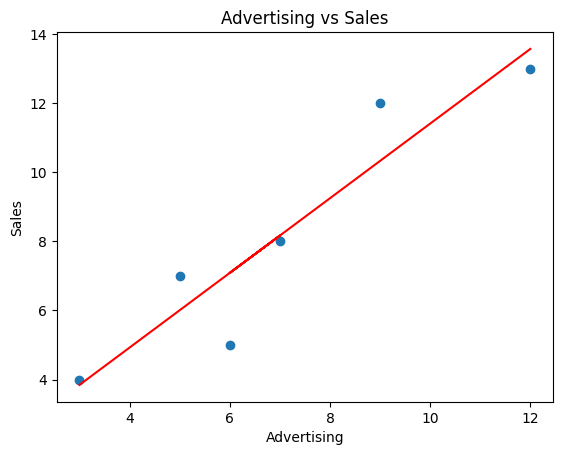

In [6]:
yh = m * adv + c   #linear realtion between adv and sales

plt.scatter(adv , sales)
plt.plot(adv , yh , c='red')

plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Advertising vs Sales")

plt.show()

In [7]:
#let consider advertisement cost = 56.7, then predict the sales value

predicted_sales = m * 56.7 + c
print(predicted_sales)

61.84266666666667


In [8]:
#Calculte possible errors

mae = abs(sales - yh).mean()
print("Mean absolute Error" , mae)

Mean absolute Error 0.9400000000000001


**Simple Linear Regression using Scikit-learn module**

In [9]:
adv = np.array([3 , 5 , 7, 6 , 9, 12]).reshape(6,1)
sales = np.array([4, 7 , 8, 5, 12 , 13]).reshape(6,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(adv,sales)      #features, labels

print(model.intercept_)
print(model.coef_)


[0.60666667]
[[1.08]]


In [10]:
pred_sales = model.predict(adv)
print(pred_sales)

[[ 3.84666667]
 [ 6.00666667]
 [ 8.16666667]
 [ 7.08666667]
 [10.32666667]
 [13.56666667]]


In [11]:
mae = abs(sales - pred_sales).mean()
print("mean_absolute_error" , mae)

mean_absolute_error 0.940000000000001


In [12]:
predicted_sales = model.predict([[56.7]])
print(predicted_sales)

[[61.84266667]]


**Regression Analysis on Advertisement Data**

In [13]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv",
                 index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

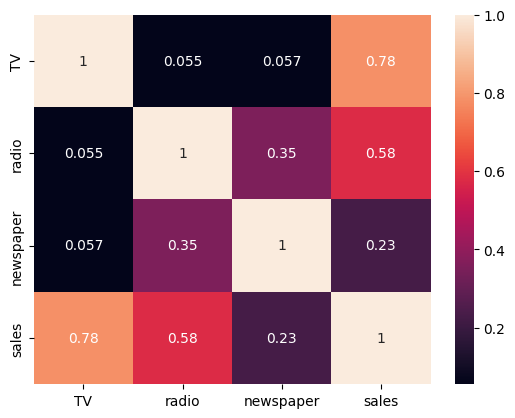

In [33]:
import seaborn as sns
sns.heatmap(df.corr() , annot=True)

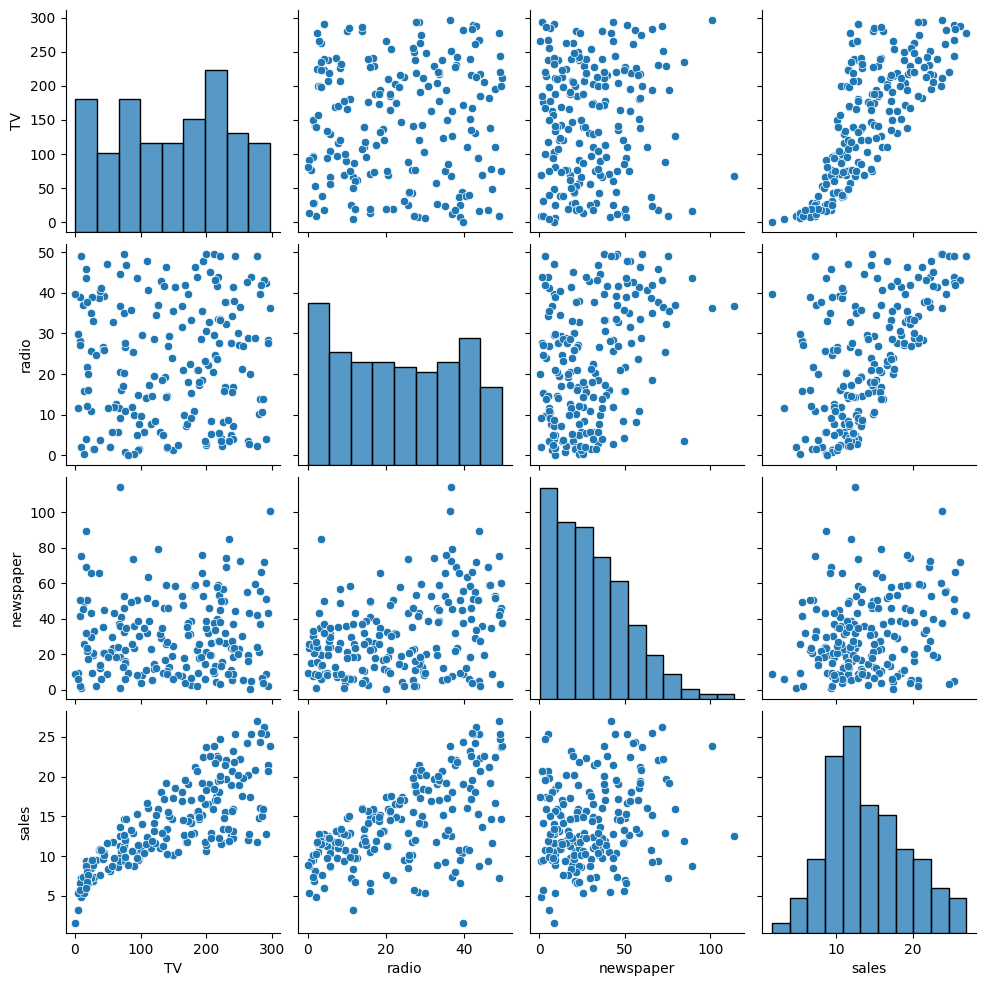

In [34]:
sns.pairplot(df)

* Given data has TV, Radio and newspaper advertisement expenses
* Sales value are also given for each set of advertisement expenses
* Build a predictive model to predict sales value if tv, radio & newspaper advertisment expenses are known.

In [14]:
df.shape

(200, 4)

In [15]:
#Define features and labels
X = df[['TV']]       #features
y = df['sales']      #label

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(xtrain,ytrain)                         #features, labels, we train predictive model using only 80% of toatl data

print(model1.intercept_)
print(model1.coef_)

7.119638430592953
[0.04652973]


In [17]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 1)
(160, 1)
(40, 1)


In [18]:
#Make predictions on train & test data
Ytrainpred = model1.predict(xtrain)
Ytestpred = model1.predict(xtest)

In [19]:
adv_tv = 19.5

salesP = model1.predict([[adv_tv]])
print(salesP)

print(model1.intercept_ + model1.coef_ * adv_tv)

[8.02696824]
[8.02696824]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
#Difference between given sales and predicted sales for both train & test data
maeTrain = abs(ytrain - Ytrainpred).mean()
maeTest = abs(ytest - Ytestpred).mean()

print("Mean Absolute Error, Train Data" , maeTrain)
print("Mean Absolute Error, Test Data" , maeTest)

Mean Absolute Error, Train Data 2.58308426066599
Mean Absolute Error, Test Data 2.444420003751042


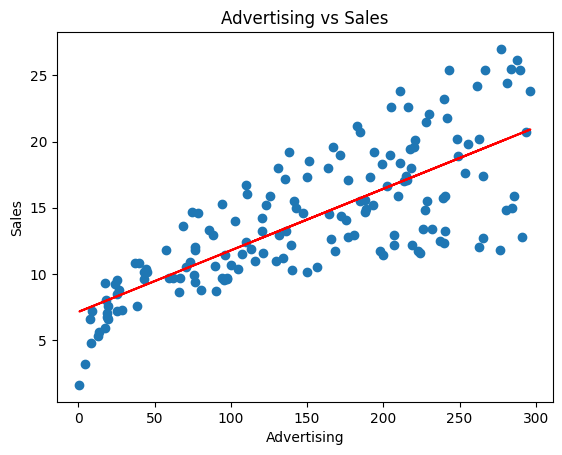

In [21]:
plt.scatter(xtrain,ytrain)

plt.plot(xtrain,Ytrainpred,'r')

plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Advertising vs Sales')

plt.show()

In [22]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
X = df[['TV' , 'radio']]
y = df['sales']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

model2.fit(xtrain,ytrain)

print(model2.intercept_)
print(model2.coef_)

3.028255250783305
[0.0447283  0.19066726]


In [24]:
ytrainPred = model2.predict(xtrain)
ytestPred = model2.predict(xtest)

maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

print("Mean Absolute Error, Train", maeTrain)
print("Mean Absolute Error, Test", maeTest)

Mean Absolute Error, Train 1.1965003043815416
Mean Absolute Error, Test 1.4443023138227578


In [27]:
#Model3 => features = TV,radio & newspaper & labels => sales

X = df[['TV' , 'radio' , 'newspaper']]
y = df['sales']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

model3.fit(xtrain,ytrain)

print(model3.intercept_)
print(model3.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [28]:
ytrainPred = model3.predict(xtrain)
ytestPred = model3.predict(xtest)

maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

print("Mean Absolute Error, Train", maeTrain)
print("Mean Absolute Error, Test", maeTest)

Mean Absolute Error, Train 1.1984678961500137
Mean Absolute Error, Test 1.4607567168117603


In [29]:
tv = 54
radio = 89
newspaper = 12

sales1 = model1.predict([[tv]])
sales2 = model2.predict([[tv,radio]])
sales3 = model3.predict([[tv,radio,newspaper]])

print(sales1 , sales2 , sales3)

[9.63224405] [22.4129701] [22.26595448]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Non-LinearRegression**